In [1]:
import pandas as pd
import seaborn as sns

from aging.plotting import (
    figure,
    format_plots,
    PLOT_CONFIG,
    save_factory,
)

In [2]:
format_plots()
saver = save_factory(PLOT_CONFIG.save_path / "fig4-longv1-lab-comments", tight_layout=False)

In [3]:
lm_corrs = pd.read_parquet('/n/scratch/users/w/wg41/linear_model_syll_death_corrs.parquet')
bambi_corrs= pd.read_parquet('/n/scratch/users/w/wg41/bambi_syll_death_corrs.parquet')

In [4]:
lm_corrs.head()

,bio_age
62,-0.448653
32,-0.410903
64,-0.395327
13,-0.374762
36,-0.373334


In [5]:
bambi_corrs.head()

,beh_age
98,-0.754602
95,-0.637240
2,-0.604512
33,-0.557584
71,-0.553309


In [6]:
joined = lm_corrs.join(bambi_corrs)

In [7]:
joined.corr(method='spearman').loc['bio_age']['beh_age']

0.2579900950506014

webf NOT subset; don't know how to subset; dropped


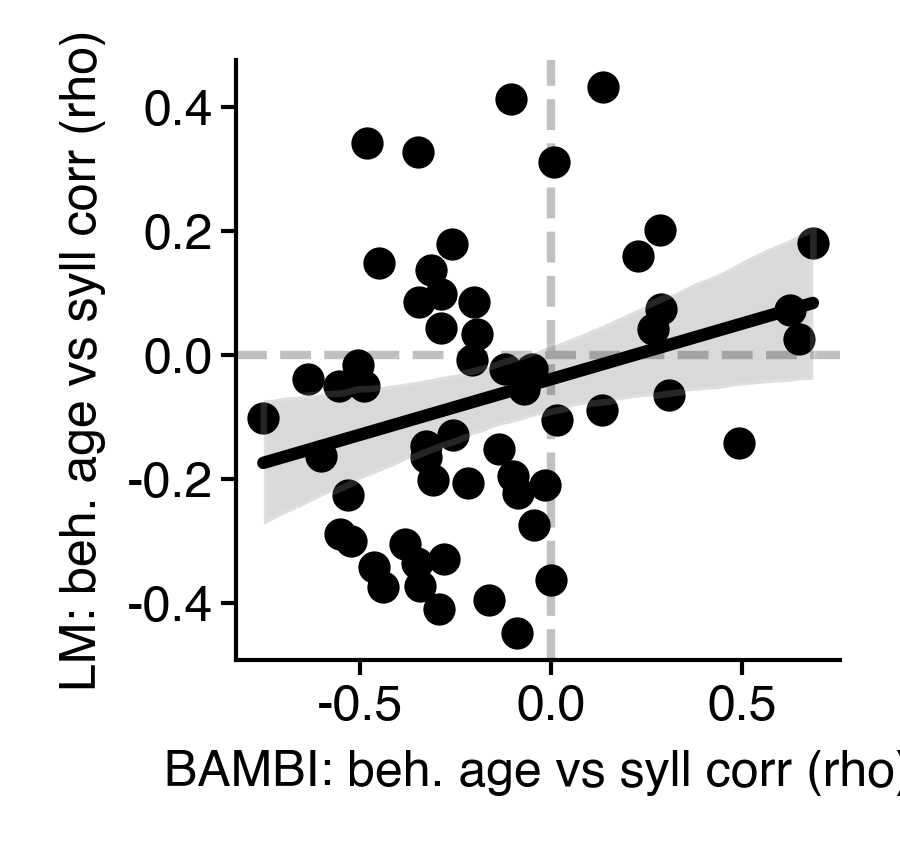

In [17]:
fig = figure(1.3, 1.3)
ax = sns.regplot(
    data=joined,
    x="beh_age",
    y="bio_age",
    color="k",
    scatter_kws=dict(s=15, linewidths=0, alpha=1),
)
ax.set(
    xlabel="BAMBI: beh. age vs syll corr (rho)",
    ylabel="LM: beh. age vs syll corr (rho)",
)
ax.axhline(0, ls='--', lw=1, color='silver', zorder=-1)
ax.axvline(0, ls='--', lw=1, color='silver', zorder=-1)
sns.despine()
saver(fig, "lm-corr-vs-bambi-corr");